In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# EDA To Prediction (DieTanic)

## Part1: Exploratory Data Analysis(EDA)

In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # 스타일시트 'fivethirtyeight' 사용
import warnings
warnings.filterwarnings('ignore') # 경고 무시
%matplotlib inline

In [3]:
# 데이터 불러오기
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked**에 결측치가 존재함.

### How many Survived?
- 얼마나 많은 사람들이 살아남았는지 pieplot과 couuntplot으로 시각화

**pie**
- autopct: 부채꼴 안에 표시될 숫자의 형식
- explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도 (0.1 = 10%)
- shadow: 그림자


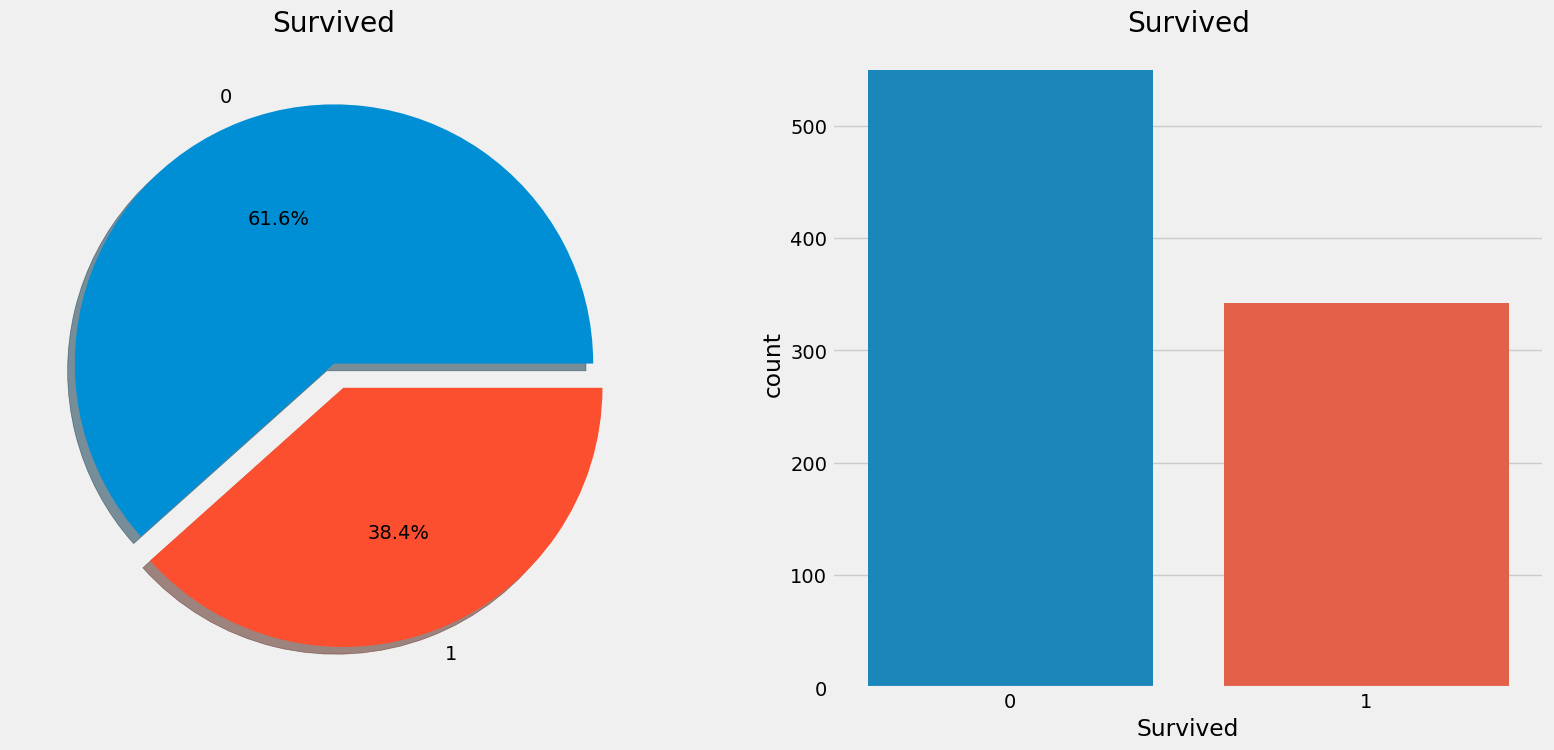

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 1행 2열 18x8 사이즈

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) 
ax[0].set_title('Survived') # 제목
ax[0].set_ylabel('') # ylabel 빈칸 처리

sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 'Survived' 시각화를 통해 많은 사람들이 살아남지 못했음을 알 수 있음 (전체의 38.4%만 생존)
- 앞으로 어떤 카테고리의 탑승객이 생존했는지, 생존하지 못했는지 살펴봄

### Types of Features

#### Categorical Features
- 2개 이상의 카테고리 변수
- ex) 성별(남/여)
- 정렬하거나, 순위를 매길 수 없는 변수
- 명목 변수
- **Sex**, **Embarked**

#### Ordinal Features
- 정렬, 순위매기기 가능
- ex) 키(tall/medium/short)
- **PClass**

#### Continous Features
- **Age**

### Analysing The Features

#### Categorical Feature: Sex

In [6]:
# 'Sex', 'Survived' 기준으로 그룹핑 후 'Survived' 값 세기
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

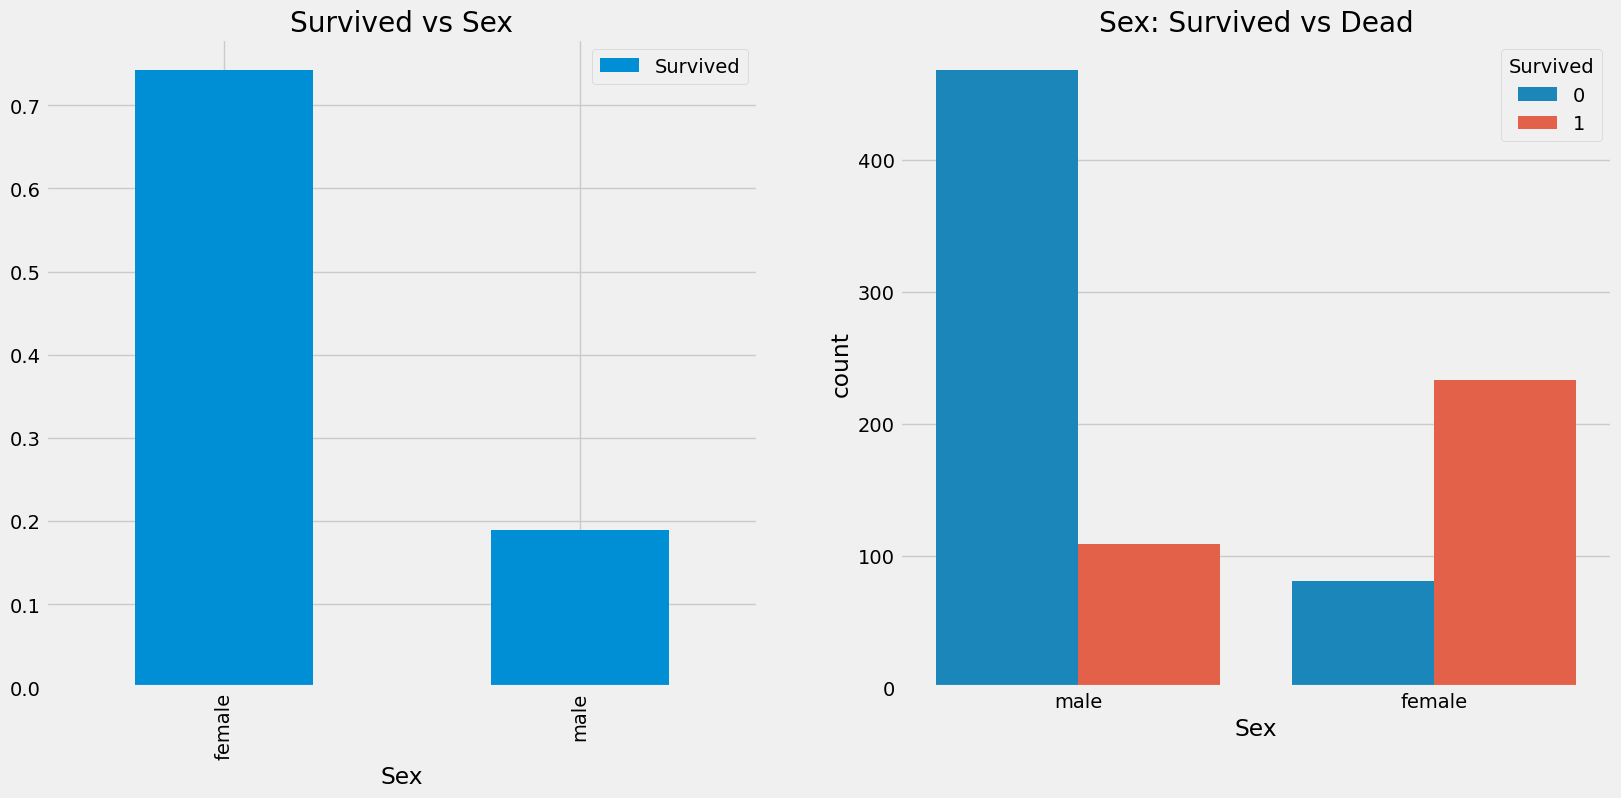

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # 1행 2열 18x8 사이즈

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex') # 제목

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1]) # hue: 구분
ax[1].set_title('Sex: Survived vs Dead') # 제목
plt.show()

- 배에 탑승한 남자 인원수는 여자보다 많지만, 실제로 생존한 사람의 성별은 여성이 남성의 두배임을 알 수 있음
- 여성의 생존률은 약 75%인 반면, 남자의 생존률을 18-19% 정도임
- 모델링에 있어 중요한 특성으로 보임
- 이어서 다른 특성들도 살펴봄

#### Ordinal Feature: Pclass

**crosstab**
- pd.crosstab(index, columns,margins)
- index: y축에 위치할 값
- columns: x축에 위치할 값
- margins: 총합
- .style.background_gradient(cmap='summer_r'): 배경색

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


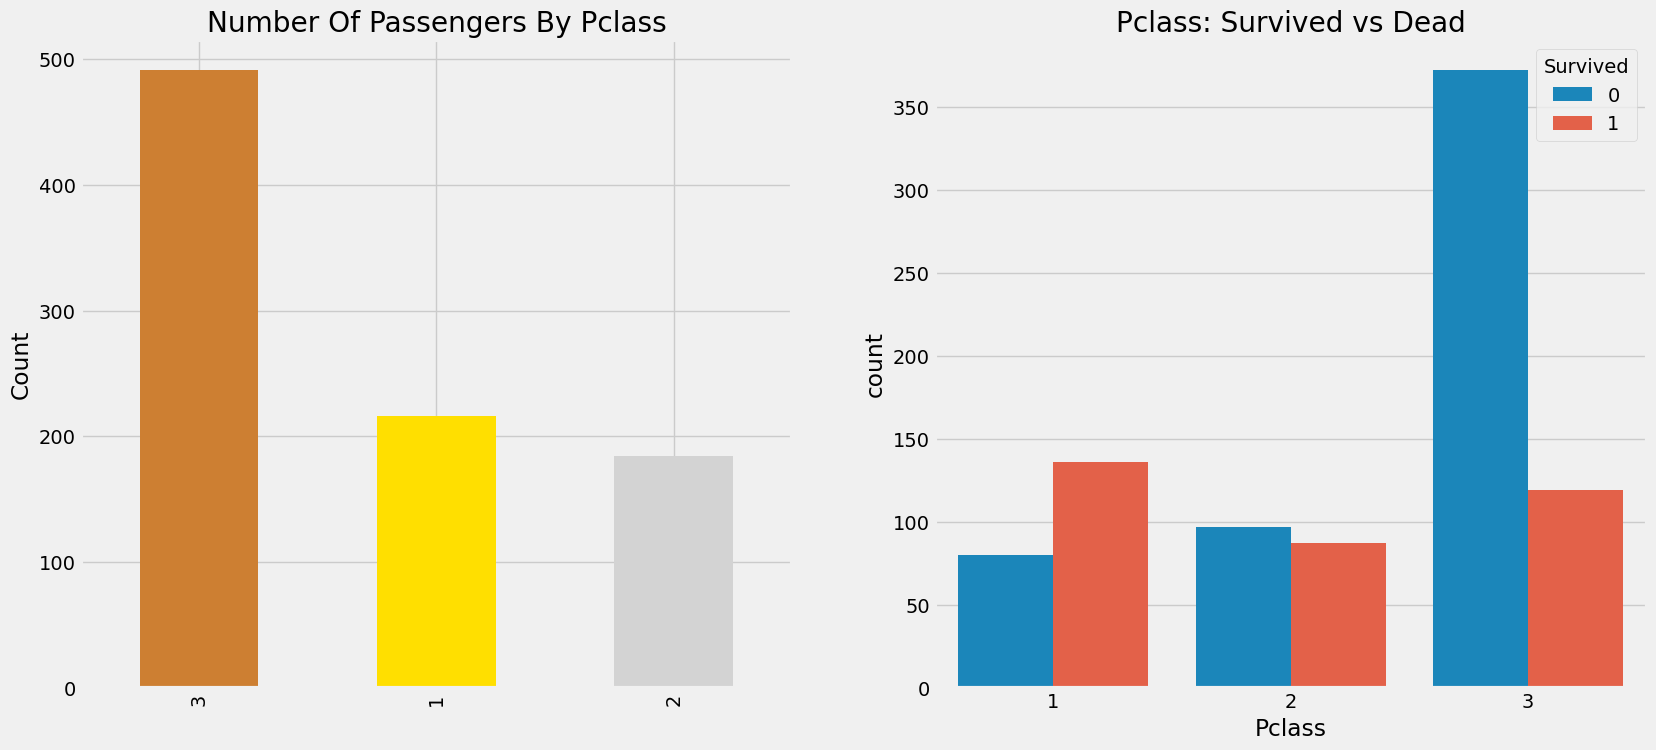

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- Pclass별 생존 여부를 보면, 1등급의 탑승객이 가장 많이 생존했음.
- 3등급 탑승객이 가장 많지만, 약 25% 정도의 매우 낮은 생존율을 보임.
- 1등급 탑승객은 약 63%가 생존, 2등급 탑승객은 약 48%가 생존
- => 이를 통해 돈과 지위가 중요함을 알 수 있음
- 이어서 Sex와 Pclass를 같이 비교

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

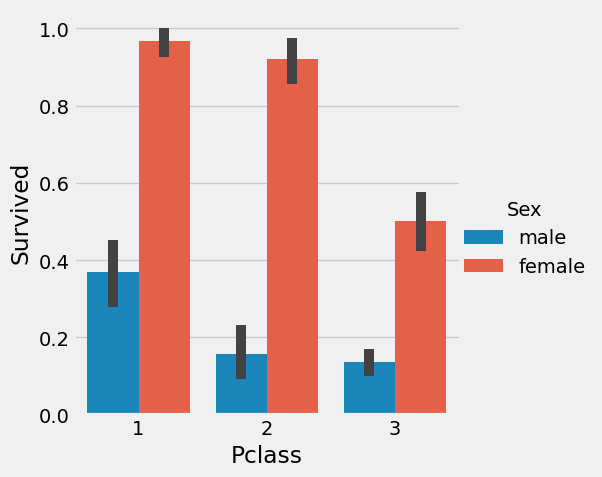

In [11]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar')
plt.show()

- 1등급의 여성들은 약 95-96% 생존했음.(1등급에서 단 3명의 여성만 사망)
- 등급에 관계없이 여성들은 구조 우선순위였을 것임
- 1등급 남성들의 생존률이 조차 매우 낮음
- Pclass도 매우 중요한 특성으로 보임.
- 이어서 다른 특성들도 분석

#### Continous Feature: Age

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Passenger was of:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Passenger was of: 29.69911764705882 Years


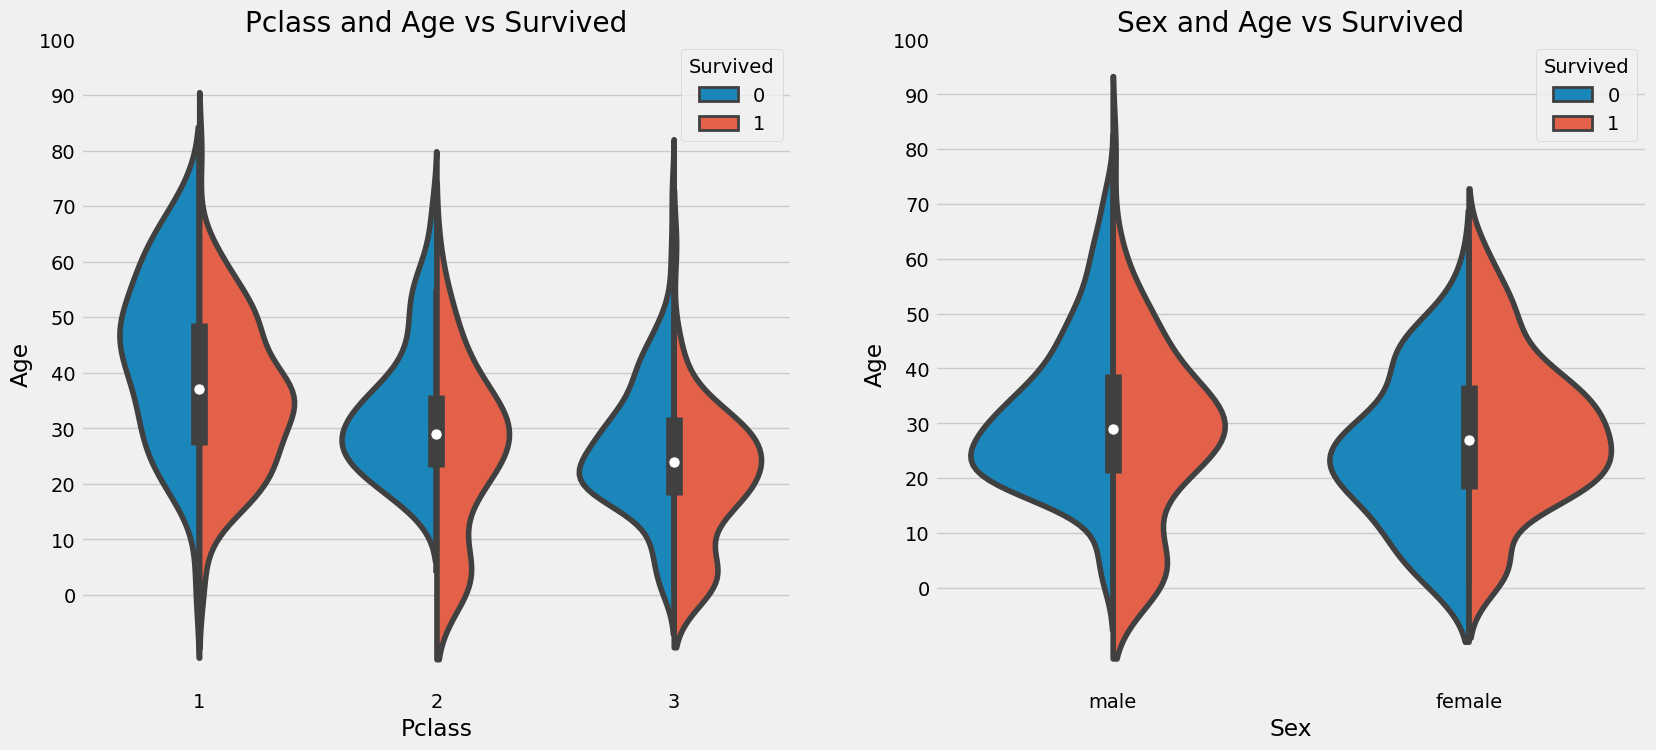

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- Pclass와 함께 어린이의 수가 증가하고, 10세 이하의 승객의 생존율은 Pclass와 관계없이 양호함
- 1등급에 탑승한 20-50대 승객들의 생존 가능성이 높고, 특히 여성의 생존율이 높음
- 남성에게 있어 나이가 높을 수록 생존 가능성이 낮음

앞서 살펴봤던 177개의 Age 결측치를 평균값으로 대체함
- 하지만, 4살 아이를 평균값인 29살로 대체할 수는 없음
- Name을 확인하여 여성/남성을 구분한 후, 각 성별 Age의 평균값으로 대체

In [14]:
data['Initial']=0
# Name에서 A-Z 또는 a-z 사이의 문자 뒤에 점(.)이 붙는 문자열을 추출
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
# Sex에 따른 Initial 확인
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Miss를 나타내는 Mlle, Mme 같이 철자가 틀린 값들이 존재하므로 Miss로 대체해주고, 다른 값들도 같은 방식으로 대체

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [17]:
# Initial별 Age 평균
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [18]:
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial']=='Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial']=='Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial']=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any() # 하나라도(= any) 결측치가 있으면 True 리턴

False

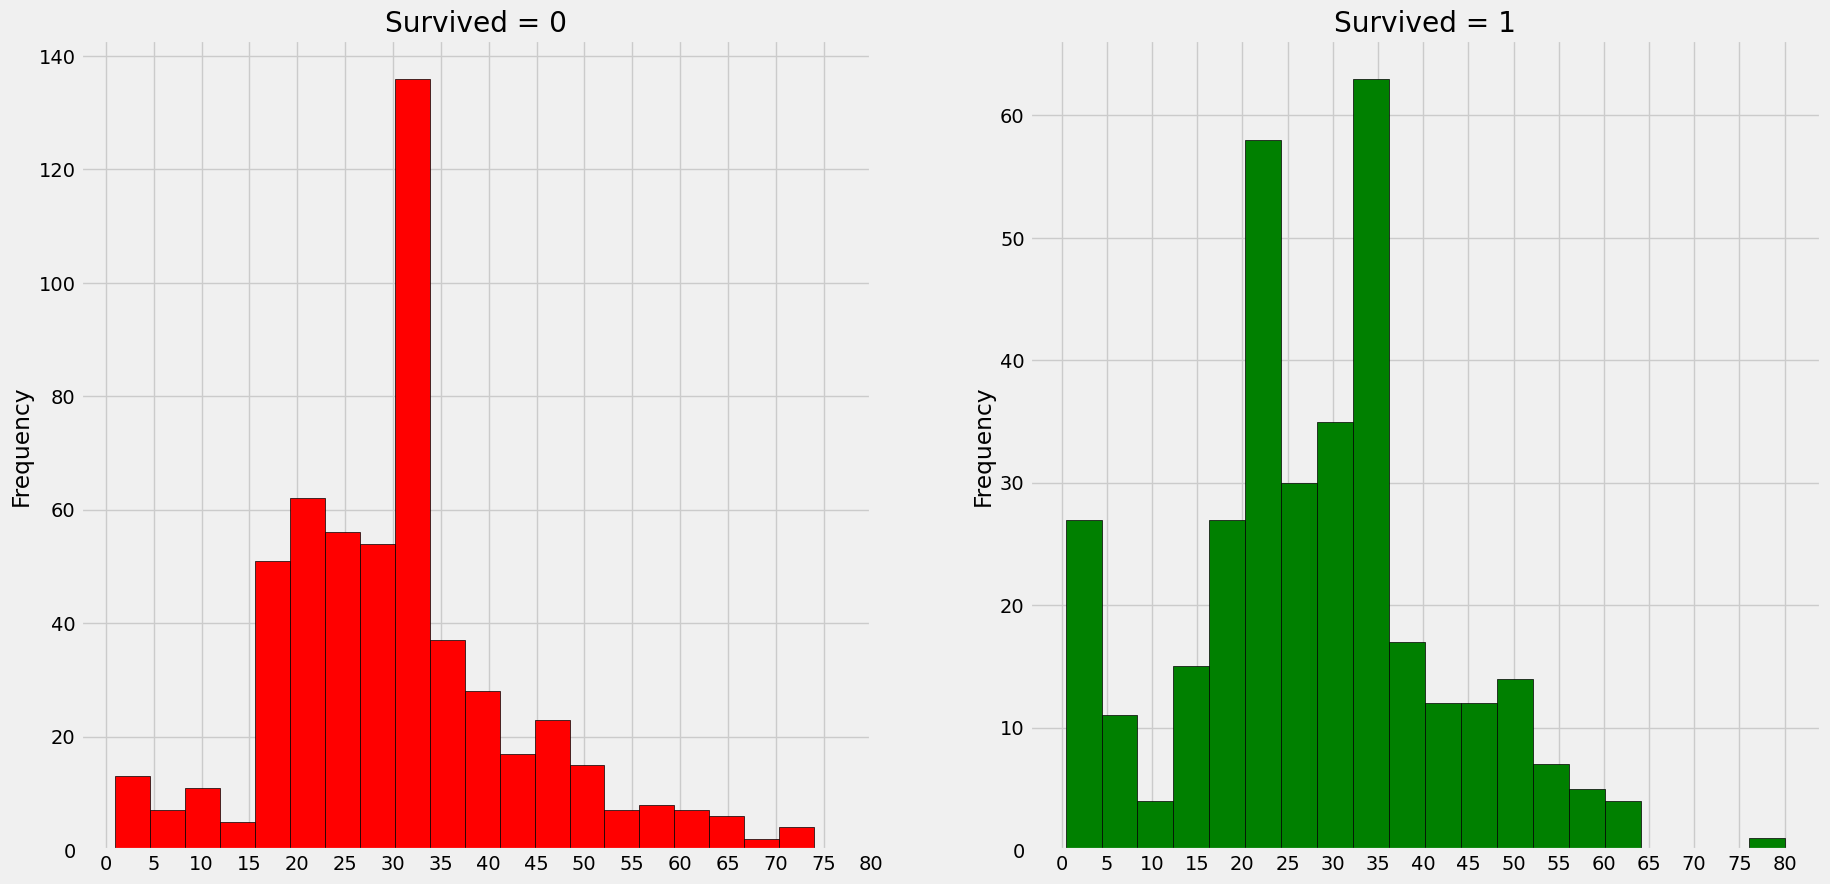

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
# 생존하지 못한 사람들의 Age 히스토그램
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black',color='red') # bins: 계급(=단위)
ax[0].set_title('Survived = 0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1) # x축 범위

# 생존한 사람들의 Age 히스토그램
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2) # x축 범위
plt.show()

- 5세 이하 아이들은 상당수 생존함(여성과 아이는 우선이라는 정책)
- 가장 나이가 많은 승객 생존
- 3-40대에 가장 많은 사망자 발생

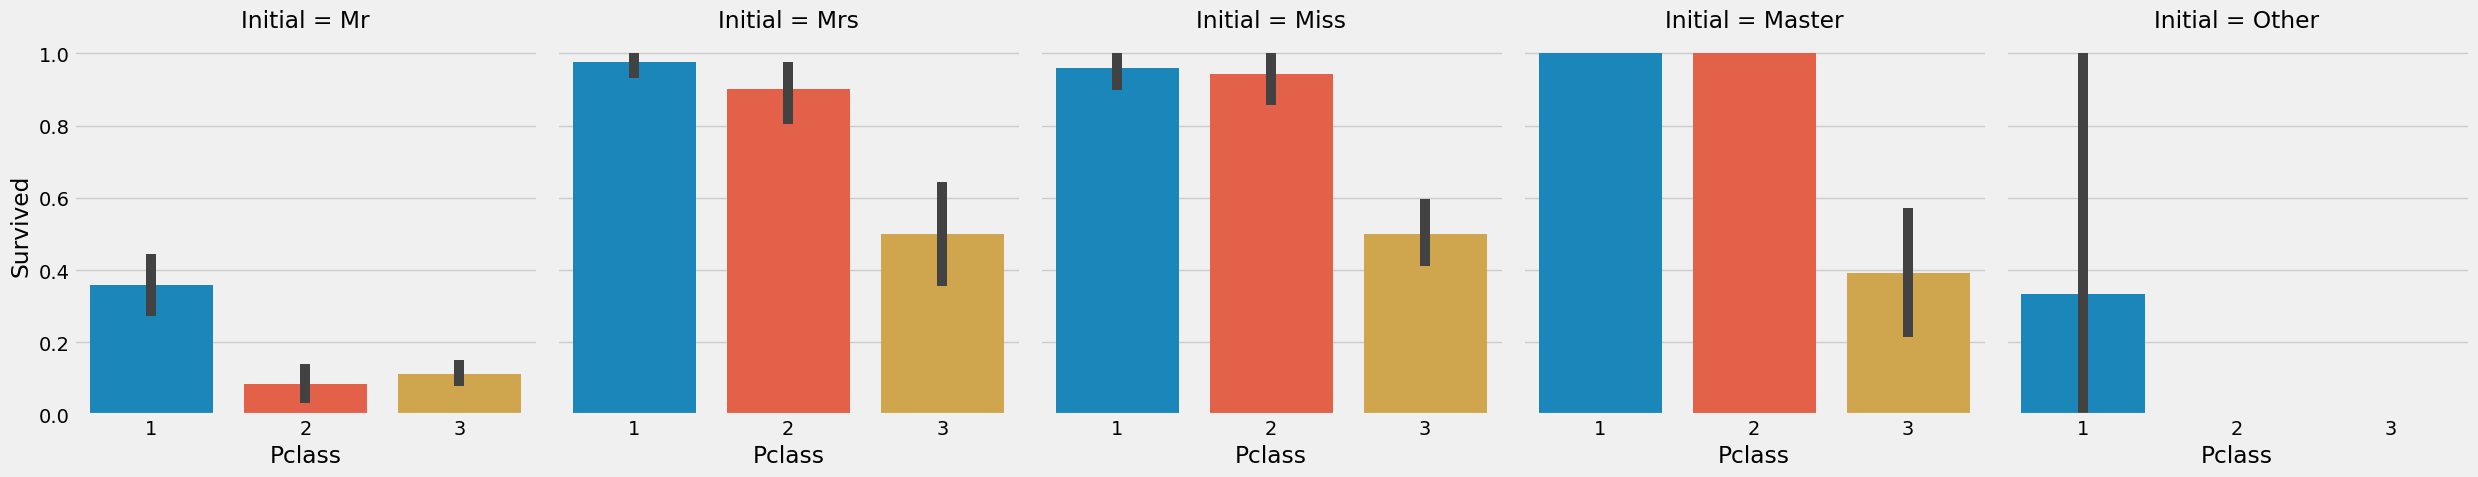

In [21]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='bar')
plt.show()

- 등급에 상관없이 여성과 아이는 우선이라는 정책은 동일함

#### Categorical Value: Embarked

In [22]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins=True).style.background_gradient(cmap='summer_r')

**Chances for Survival by Port Of Embarkation: 항구별 생존 가능 성**

- **plt.gcf()**: 현재 Figure 객체 얻기
- **plt.gca()**: 현재 Axes 객체 얻기

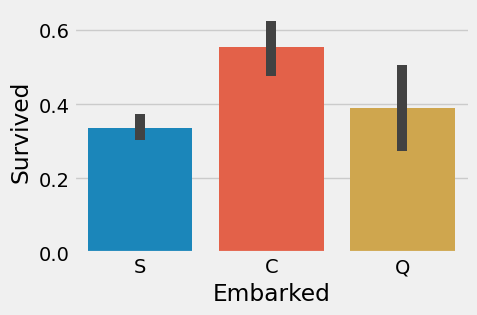

In [23]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='bar')
fig=plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

- C 항구에서의 생존율이 약 0.55로 가장 높으며, S 항구의 생존율이 가장 낮음

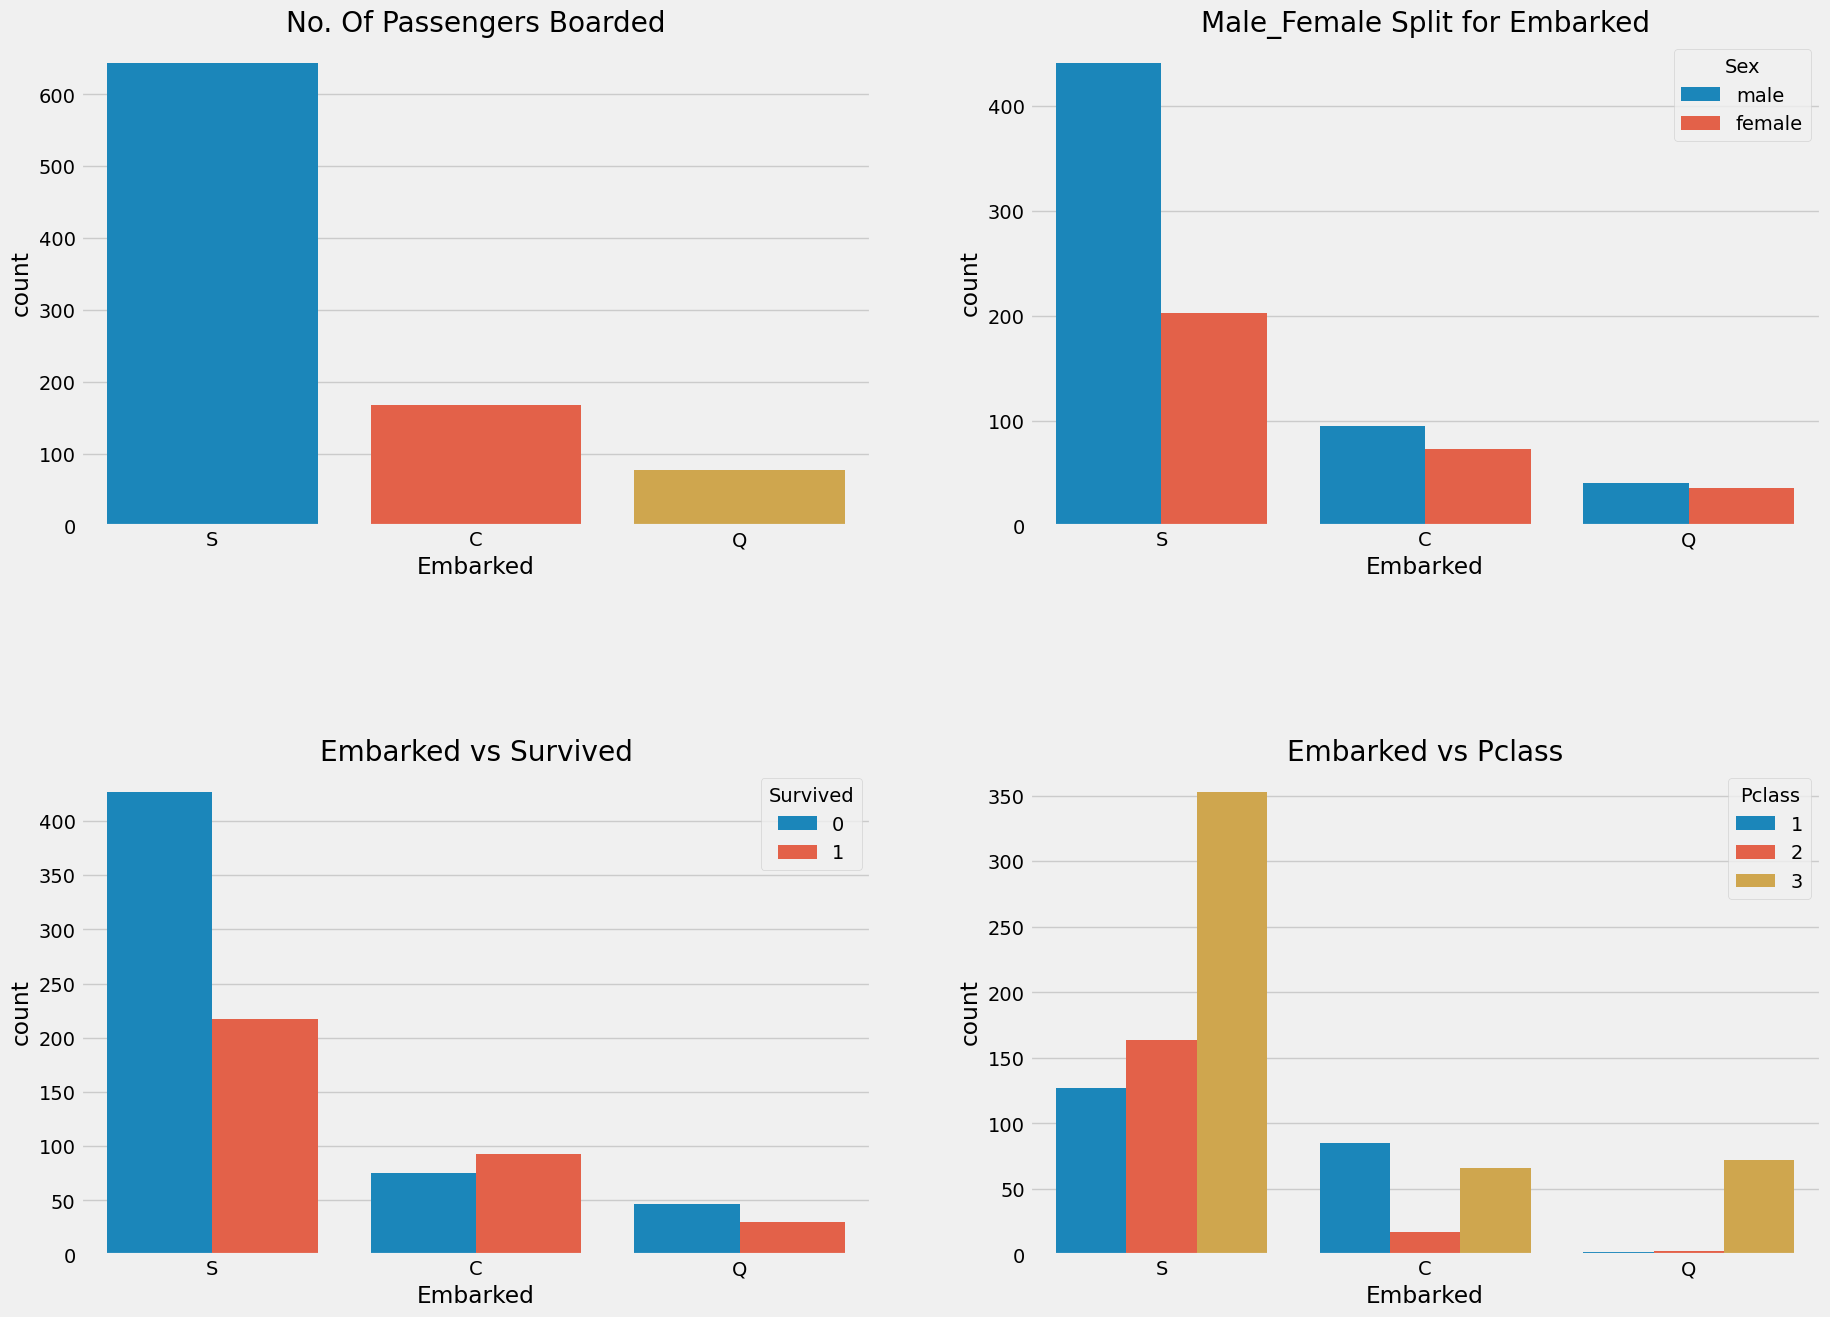

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male_Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) # 서브플롯간의 간격
plt.show()

- S 항구에서 최대 승객이 탑승했으며, 대부분 3등급에 위치했다.
- C 항구 승객 대부분은 상당수가 생존하였다. 아마도 1등급, 2등급의 모든 승객일 것임
- S 항구는 돈 많은 사람들이 승선하기에 중요한 항구로 보임. 3등급 승객의 약 81%가 생존하지 못해, 전체 생존율은 낮게 보인다.

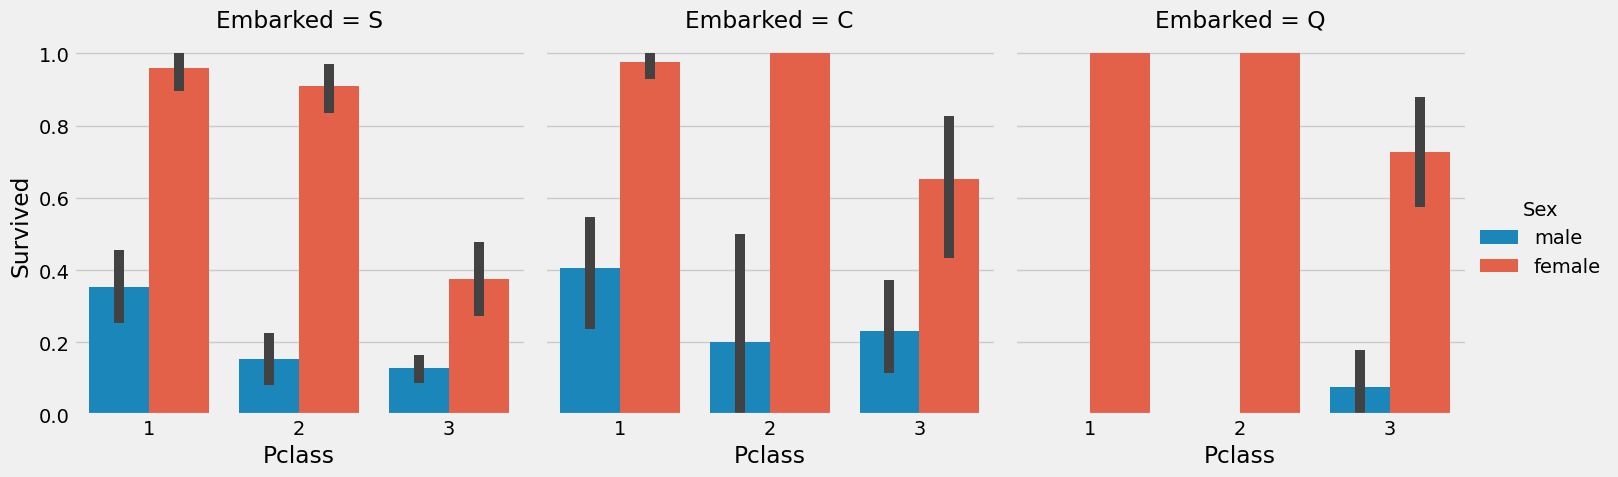

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='bar')
plt.show()

- 항구에 상관없이 1,2등급 여성들은 생존 가능성이 1에 육박함.
- S 항구는 3등급 승객들의 남/여 생존율이 모두 낮은 것으로 보아 3등급에게는 불행하게 보여짐(=돈 문제)
- Q 항구는 남성에게 매우 불행함. 대부분 3등급에서 생존.

**Filling Embarked NaN**

S 항구에서 가장 많은 승객이 탑승했으므로, 결측치를 S 항구로 대체

In [26]:
data['Embarked'].fillna('S', inplace=True)

In [27]:
data['Embarked'].isnull().any() # 'S' 대체 후 결측치 존재 X

False

#### Discrete Feature: Sibsip
- Sibsip은 혼자왔는지, 가족들과 함께 왔는지 나타냄
- **Sibling** = brother, sister, stepbrother, stepsister
- **Spouse** = busband, wife

In [28]:
pd.crosstab([data['SibSp']], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


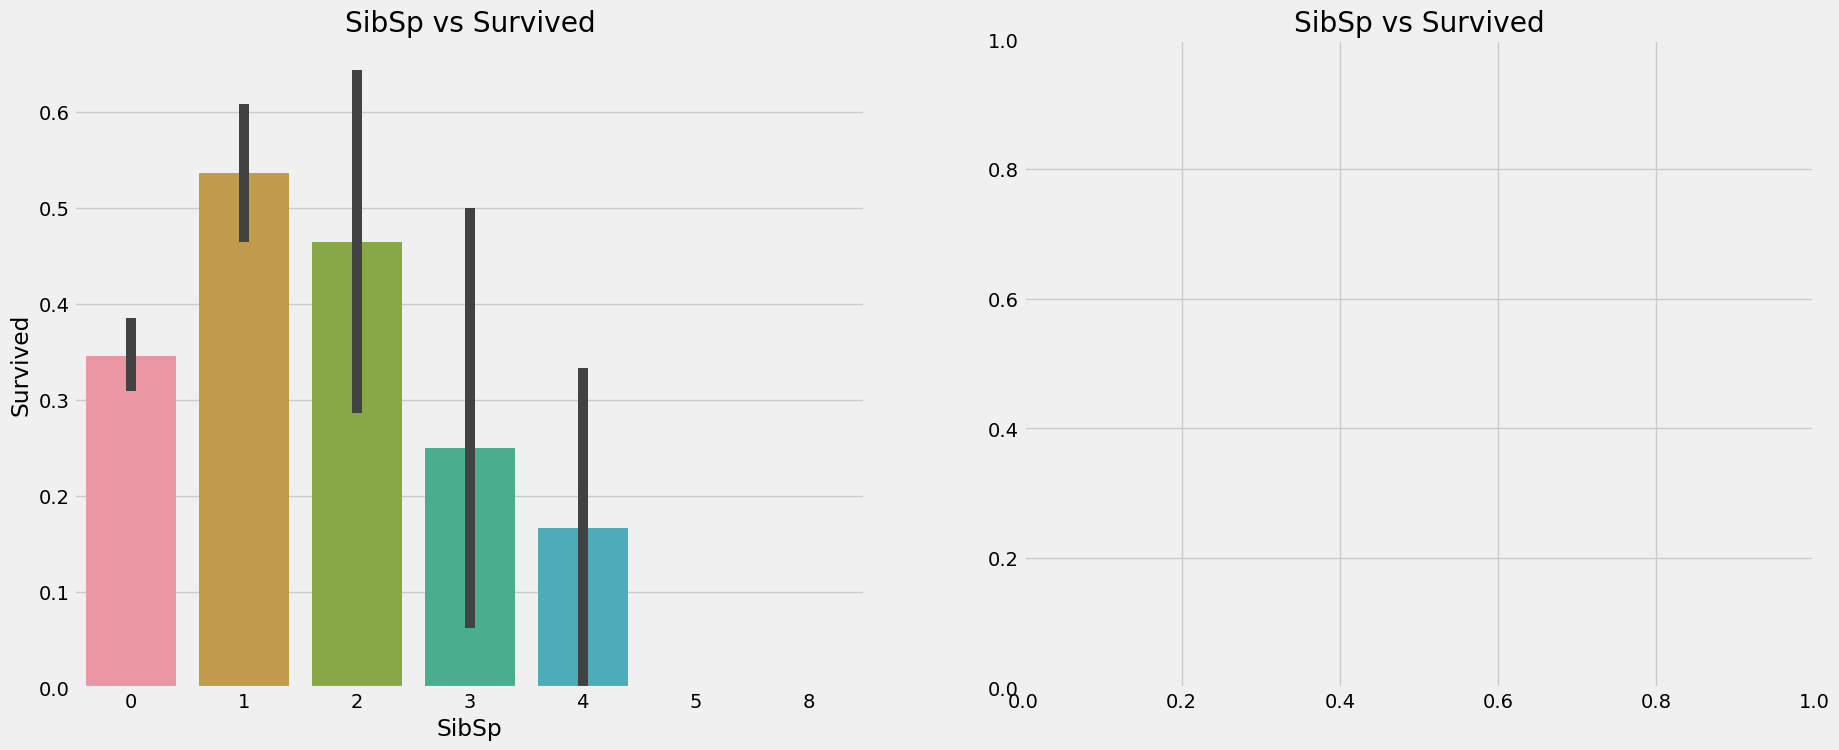

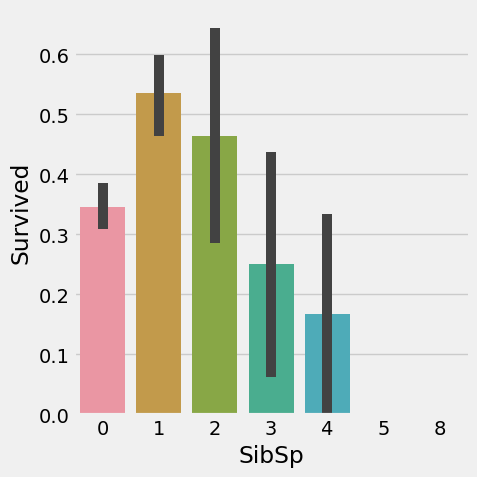

In [29]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.catplot(x='SibSp',y='Survived',data=data,ax=ax[1], kind='bar')
ax[1].set_title('SibSp vs Survived')

plt.show()

In [30]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- barplot을 통해 형제가 없이 혼자 탑승했을 경우 34.5%의 생존율을 가지는 것을 보여줌.
- 그래프는 형제수가 증가할 수록 생존율이 급격하게 감소함
- 가족이 있으면, 자신보다 가족을 먼저 살게 하려고 노력하기 때문일 것
- 5-8명인 경우 생존율은 0%임
- crosstab을 보면 4명 이상의 가족이 있으면 모두 3등급에 탑승했음.
- 3등급에 탑승한 모든 대가족이 사망함 

#### Parch

In [31]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- 이 crosstab 역시 3등급에 대가족들이 탑승해 있었음을 보여줌

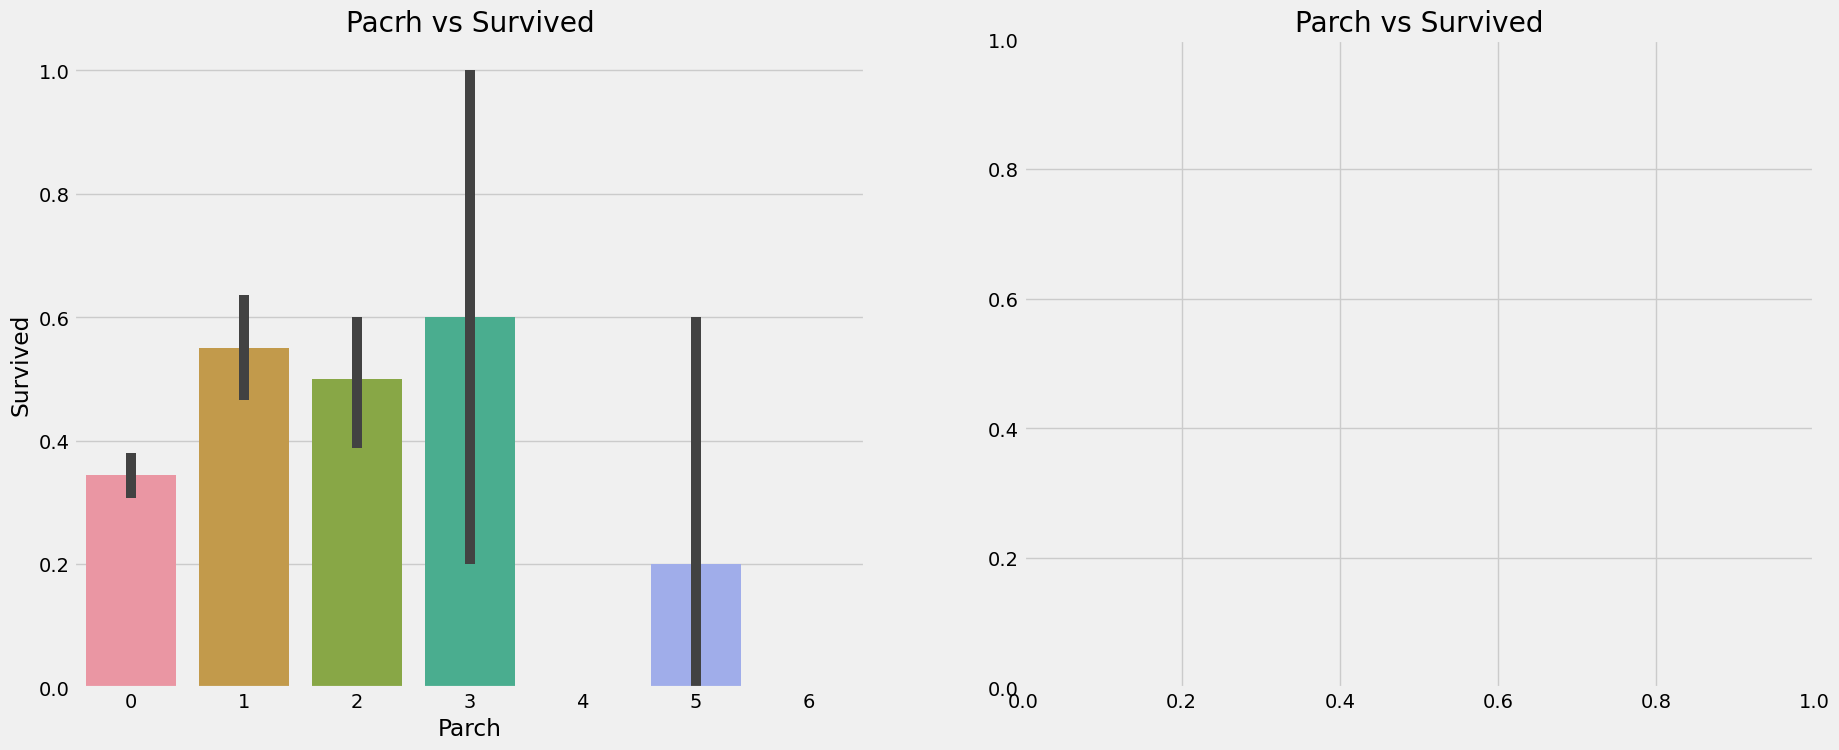

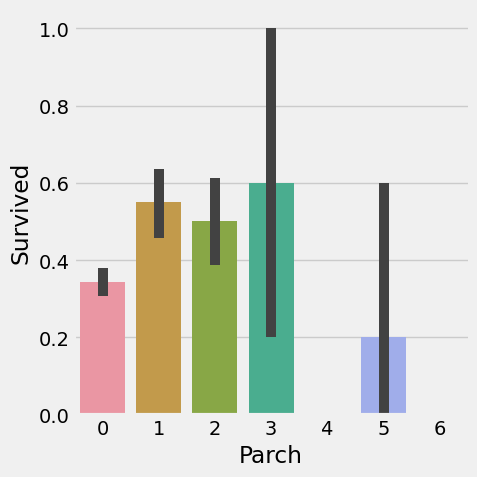

In [32]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Pacrh vs Survived')

sns.catplot(x='Parch', y='Survived', data=data, ax=ax[1], kind='bar')
ax[1].set_title('Parch vs Survived')

plt.show()

- 부모님과 함께 탑승했을 경우 생존 가능성이 꽤 높지만, 수가 많아질 수록 감소한다.
- 1-3명의 부모님과 함께 탑승한 경우 생존 가능성이 높다.
- 혼자인 경우에도 치명적이고, 4명보다 많은 경우에는 생존 가능성이 감소한다.

#### Continous Feature: Fare

In [33]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


가장 낮은 요금이 0.0이다! 무료!

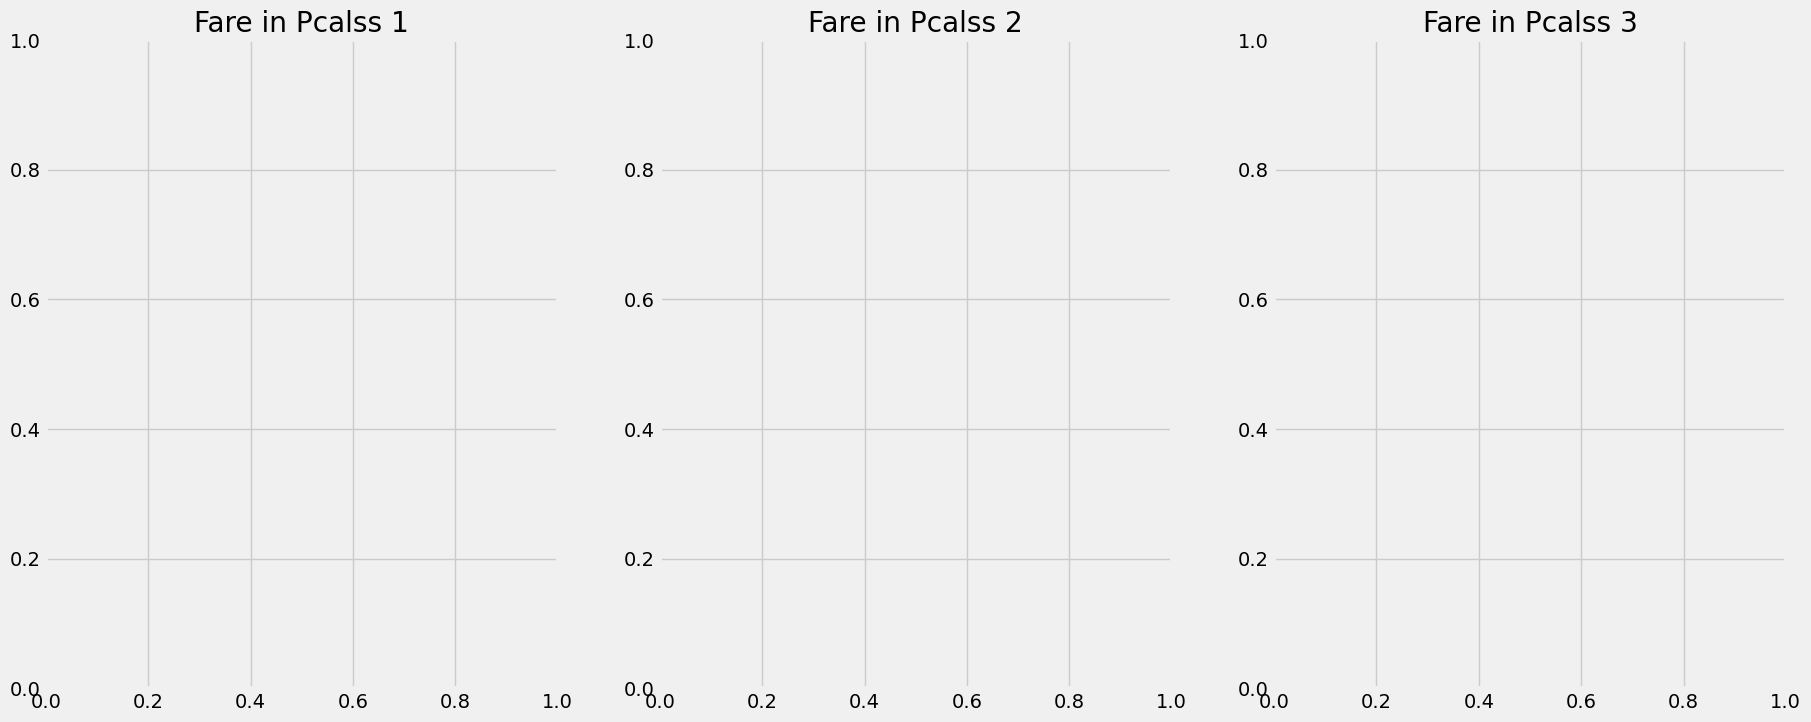

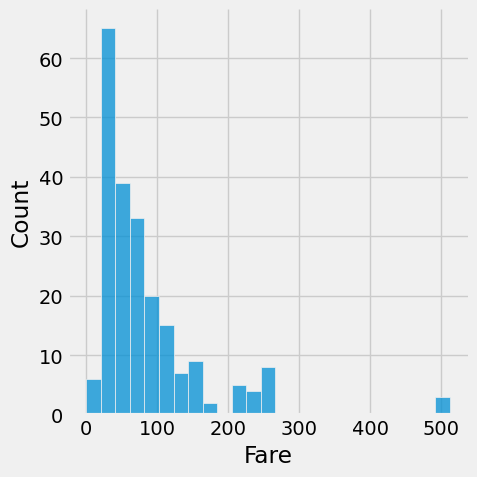

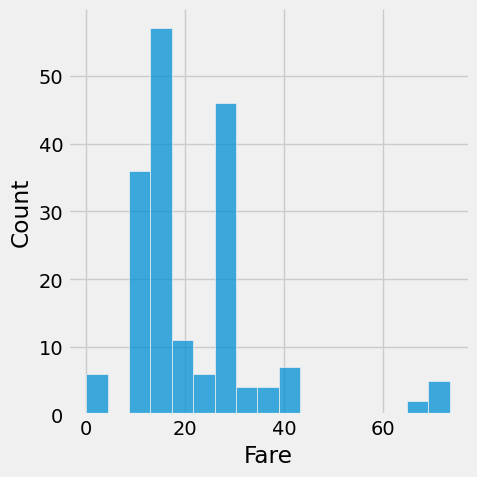

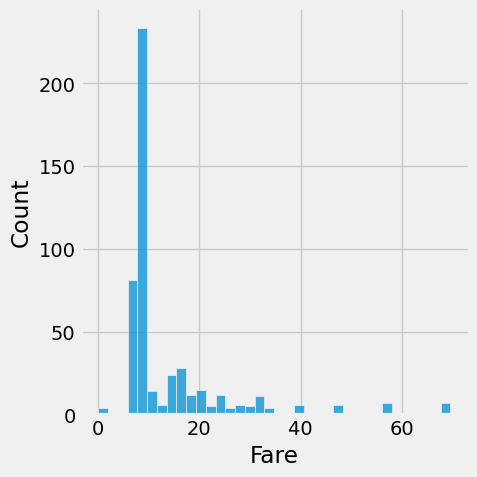

In [34]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.displot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pcalss 1')

sns.displot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pcalss 2')

sns.displot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pcalss 3')

plt.show()

- 1등급 승객들의 요금에 큰 차이가 있는 것으로 보이며, 이 차이는 점차 감소함.
- 연속적이므로, bin 설정을 통해 불연속적으로 변환 가능

### 모든 Features에 대한 관찰 결과
**Sex**: 여성의 생존 가능성이 남성에 비해 높다.

**Pclass**: 1등급 탑승객이 생존 가능성이 높고, 3등급이 매우 낮다. 여성의 경우, 1등급에서는 1에 가까운 생존율이, 2등급에서도 높은 생존율을 보였다. 

**Age**: 5-10세 이하의 어린이들은 생존 가능성이 높다. 15세에서 35세의 승객은 많이 사망하였다.

**Embarked**: 대부분의 1등급 승객이 S 항구에 있었지만, C 항구의 생존 가능성이 높았다. Q 항구의 모든 승객은 3등급에 탑승하였다.

**Parch + SibSp**: 대가족 또는 혼자 탑승한 사람들 보다, 1-2명의 형제 또는 1-3명의 부모와 함께 탑승했을 때 높은 생존율을 보였다.

### Correlation Between The Features

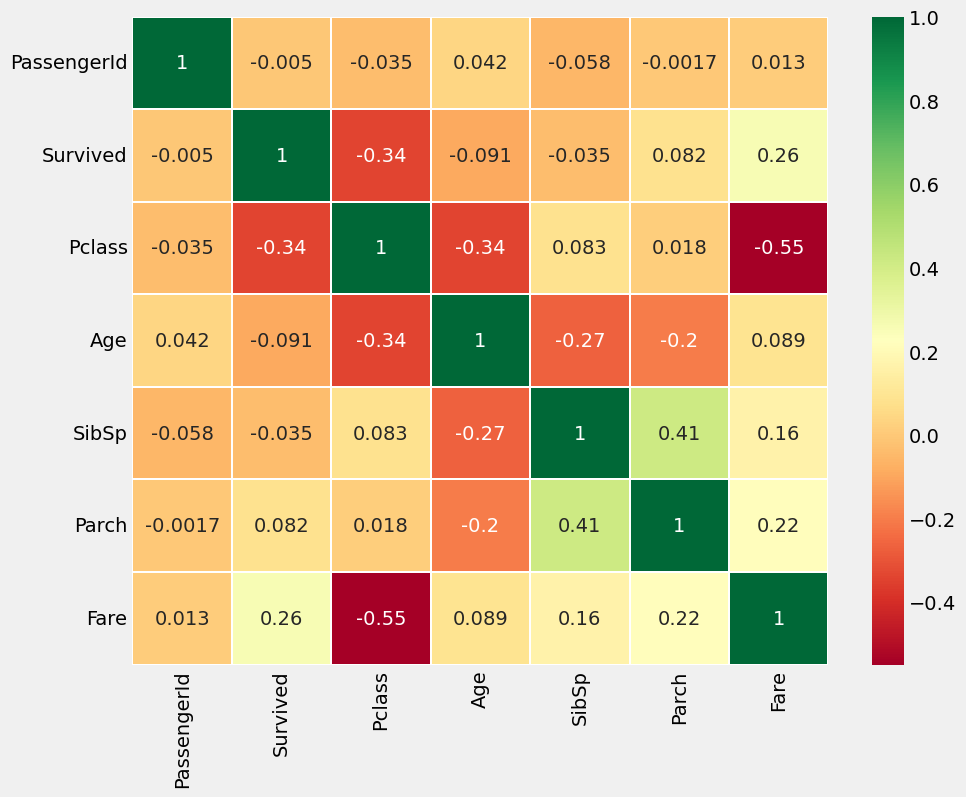

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # annot: 셀 안에 숫자 출력
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

**상관관계**
- 양의 상관관계: A가 증가할 때 B도 증가하면, 양의 상관관계를 가진다. 1이면 완전 양의 상관관계
    - 만약, 두 특성이 매우 높거나 완전 양의 상관관계일때, 유사한 정보를 가지고 있으면 **다중선형성** 이라 함.
    - 중복인 특성을 제거하면 모델을 만들거나 모델 훈련 시, 훈련 시간을 줄일 수 있음
    
- 음의 상관관계: A가 증가할 때 B는 감소하면, 음의 상관관계를 가진다. -1이면 완전 음의 상관관계

**Heatmap 해석**
- 많은 특성들이 상관관계를 가지지 않음.
- 가장 높은 상관관계는 SibSp & Parch(0.41)이므로, 모든 특성 사용 가능

## Part2: Feature Engineering and DataCleaning

**Feature Engineering?**
- 중복되는 feature는 제거해야 함.
- feature들로 부터 정보를 추출하거나 새로운 feature를 만들 수 있음
- ex) 'Initial'
- 예측 모델에 적절하게 중복되는 feature는 제거하는 등 변환작업

#### Age_band
**Age의 문제점**
- 연속적인 값을 가지기 때문에 머신러닝 모델에서 문제가 생김
- 연속적인 값을 카테고리 값을 가지도록 변환(Normalize 또는 Binning)
- 0-80세를 5개의 계급으로 나눌 것임. 한 계급의 크기는 16(=80/5)

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[(data['Age']>64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
# 각 Age_band의 승객 수 확인
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


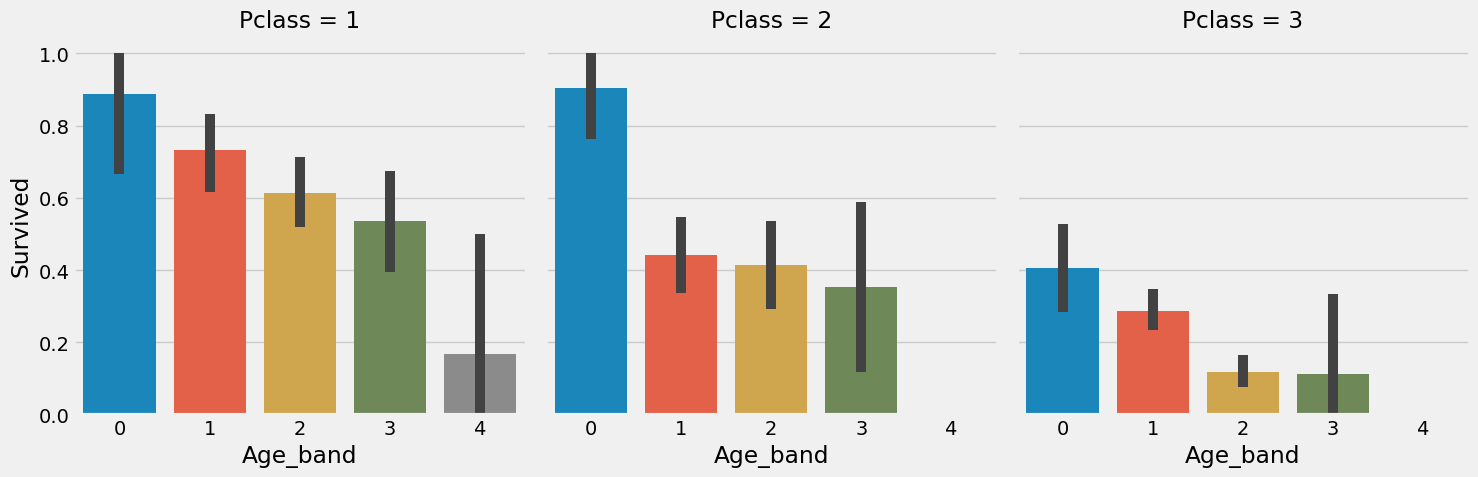

In [38]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='bar')
plt.show()

Pclass에 상관없이 나이대가 높을 수록 생존율이 감소함

#### Family_Size and Alone
Parch와 SibSp를 합쳐 Family_Size 변수 생성
- Family_Size를 통해 생존율이 승객의 가족 크기와 관련있는지 확인할 수 있음
- Alone은 혼자 탑승한 경우 1, 아닌 경우 0

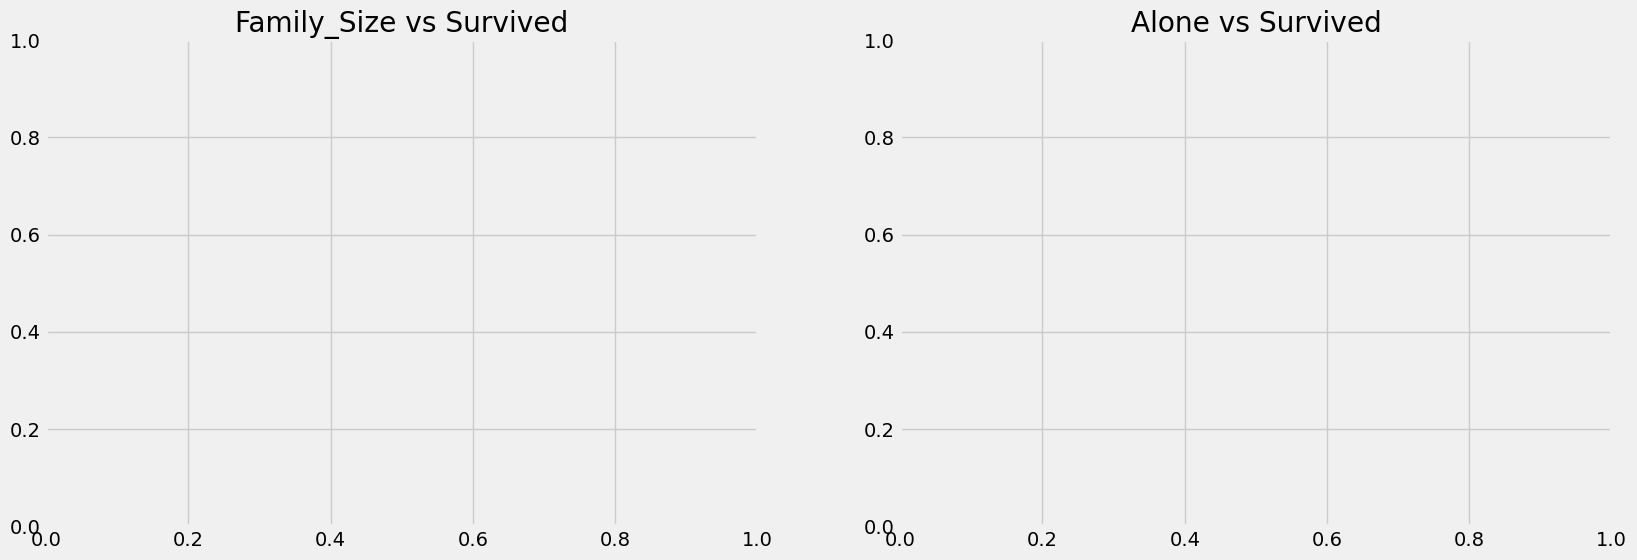

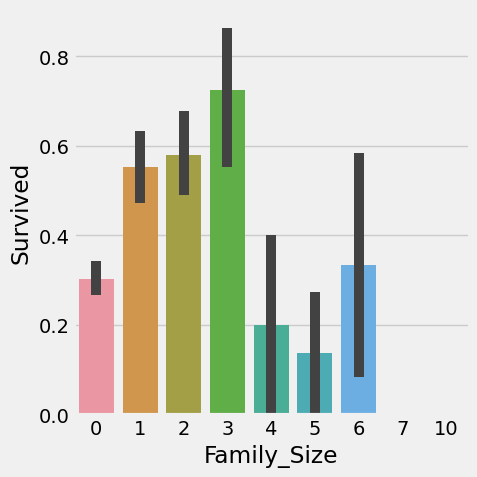

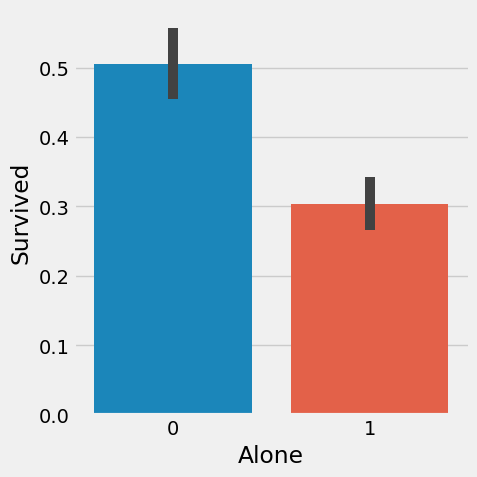

In [39]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family Size
data['Alone'] = 0
data.loc[data['Family_Size']==0, 'Alone'] = 1 # Alone

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.catplot(x='Family_Size', y='Survived', data=data, ax=ax[0], kind='bar')
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x='Alone', y='Survived', data=data, ax=ax[1], kind='bar')
ax[1].set_title('Alone vs Survived')

plt.show()

- Family_Size = 0은 혼자 탑승했다는 의미
- 혼자 탑승했으면 생존 가능성이 매우 낮음.
- Family_Size > 4 일때도 생존 가능성이 감소함
- 모델에 있어 중요한 feature로 보임

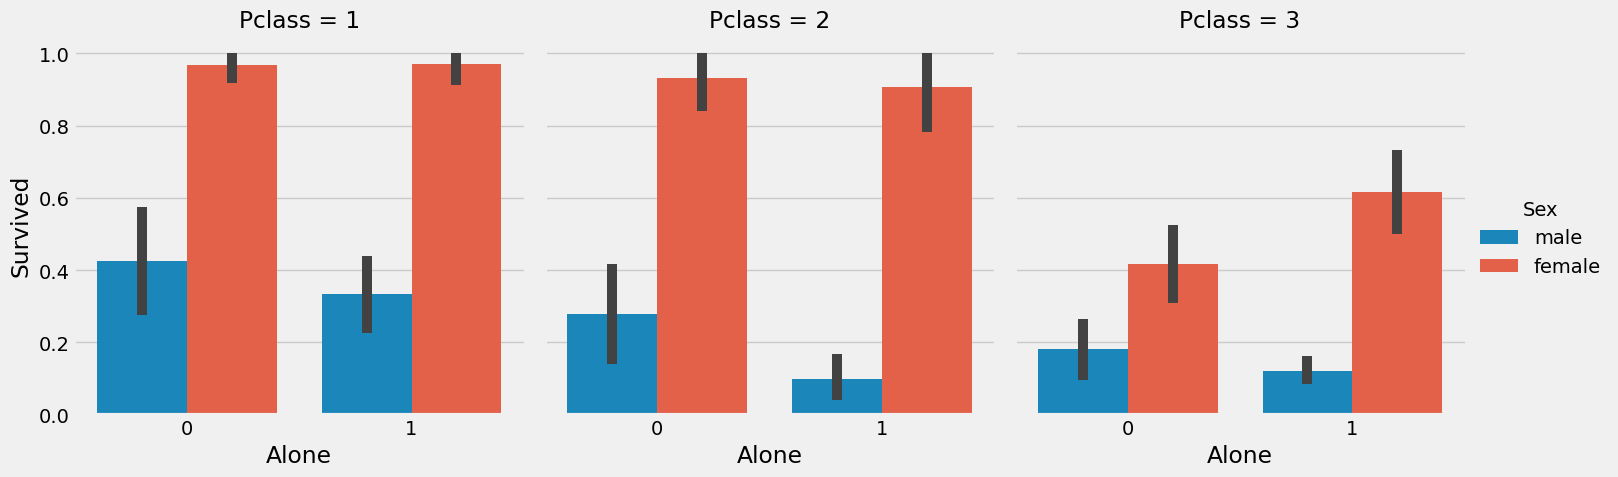

In [40]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='bar')
plt.show()

- Sex, Pclass(3등급 제외)에 관계없이 혼자 탑승했을 경우에는 매우 위험
- 3등급에서는 가족들과 함께일 경우보다 혼자 탑승한 여성의 생존 가능성이 훨씬 높음

#### Fare_Range
Fare도 연속적인 값을 가지기 때문에 순서가 존재하는 ordinal value로 변환
- pandas.qcut

In [41]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range가 증가할수록 생존 가능성도 올라간다.

In [42]:
data['Fare_cat'] = 0
data.loc[data['Fare']>=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=512.329), 'Fare_cat'] = 3

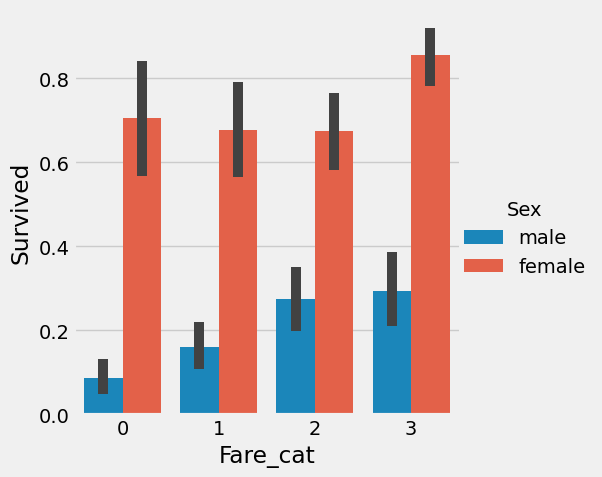

In [43]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='bar')
plt.show()

Fare_cat이 높을수록 생존 가능성이 증가한다.
- Sex와 함께할 때 모델링에서 중요한 feature가 될 것임

#### Converting String Values into Numeric
머신러닝 모델에서 문자열은 사용할 수 없으므로, 숫자로 바꿔준다.

In [44]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0, 1, 2, 3, 4], inplace=True)

#### Droping UnNeeded Feature
필요없는 변수 제거
- Name -> 카테고리로 변경할 수 없음
- Age -> Age_band가 있으므로 제거
- Ticket -> 카테고리로 변경할 수 없음
- Fare -> Fare_cat이 있으므로 제거
- Cabin -> 결측치가 많고, 많은 승객이 여러개의 cabin을 가지므로 제거
- Fare_Range -> Fare_cat이 있으므로 제거
- PassengerId -> 카테고리로 변경할 수 없음

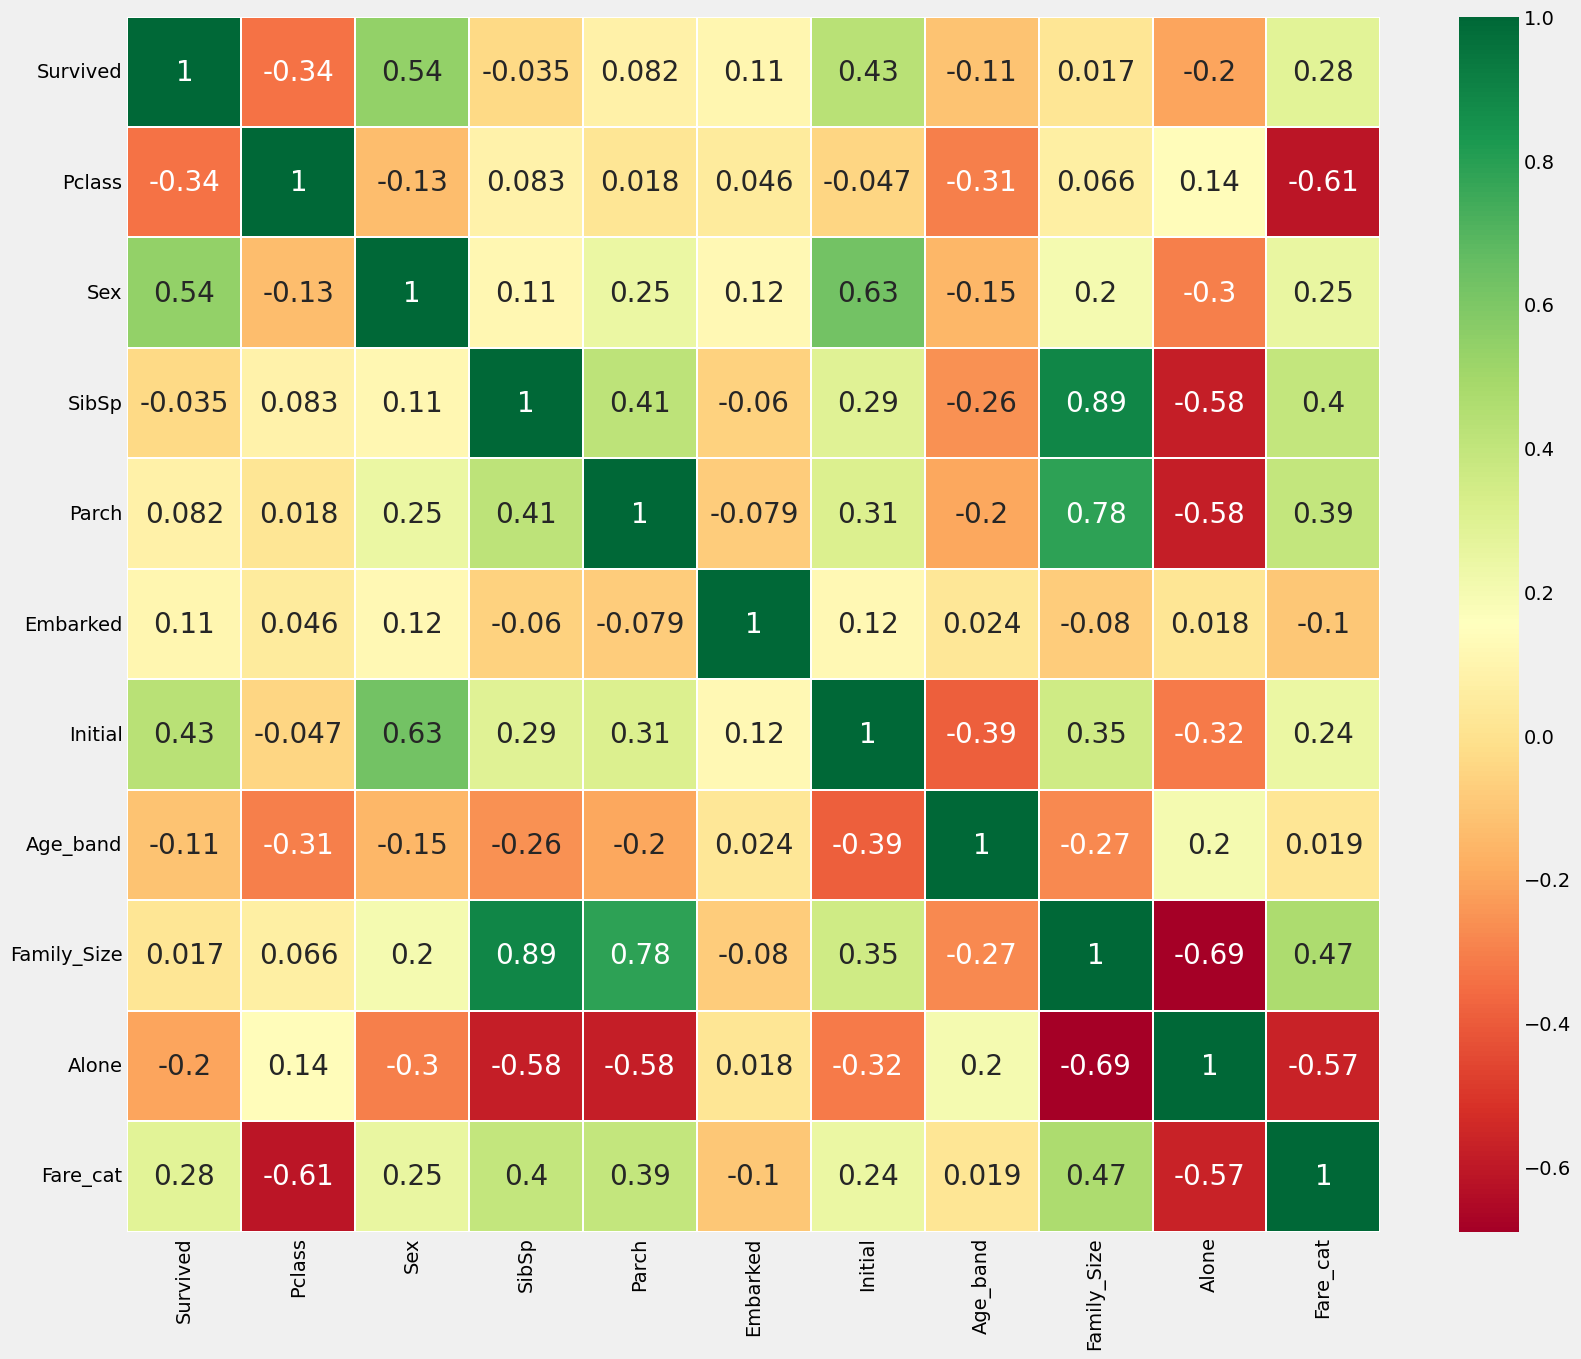

In [45]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20}) # annot_kws: 숫자 크기
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 heatmap을 통해 양의 상관관계를 가지는 feature들을 볼 수 있다.

**양의 상관관계**
- SibSp & Family_Size
- Parch & Family_Size

**음의 상관관계**
- Alone & Family_Size

## Part3: Predicitve Modeling

EDA만으로 탑승객의 생존 여부를 정확하게 예측할 수 없기 때문에 분류 알고리즘을 사용하여 탑승객의 생존여부를 예측할 것임.

1. Logistic Regression
2. Suppert Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [46]:
# 머신러닝에 필요한 패키지 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [47]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

**RBF 커널 SVM**
- SVM 알고리즘 중에서 가장 성능이 괜찮고 일반적으로 널리 사용
- 좋은 성능을 얻으려면 매개변수인 C와 gamma를 잘 조정해줘야 함
- **C**: 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도
- **gamma**: 결정 경계의 곡률
- C, gamma 모두 커질수록 알고리즘의 복잡도 증가

In [48]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [49]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


#### Logistic Regression

In [50]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8208955223880597


#### Decision Tree

In [51]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8097014925373134


#### K-Nearest Neighbours(KNN)

In [52]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.8134328358208955


KNN의 accuracy는 n_neighbours에 따라 달라진다.(기본값 K=5)

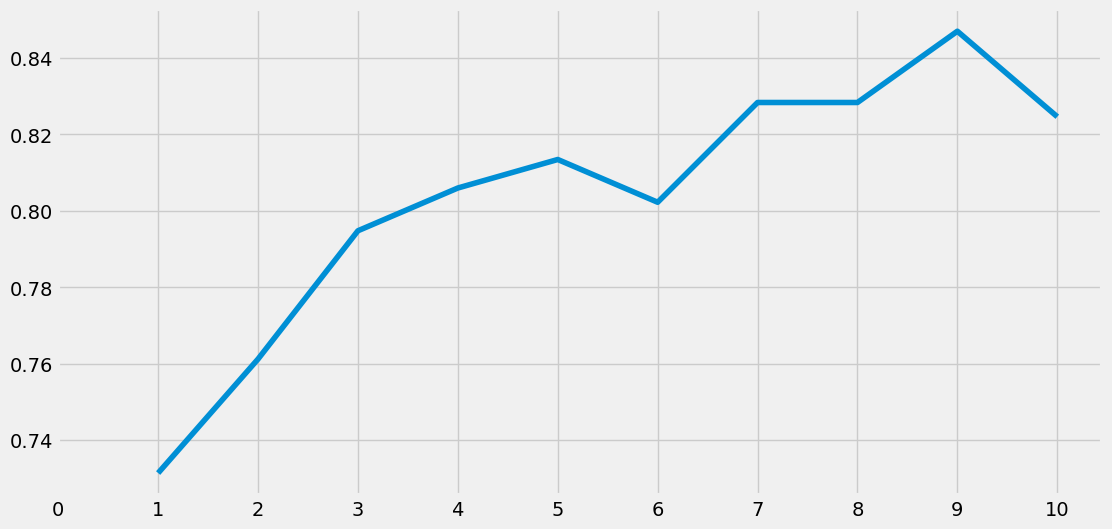

Accuracies for different values of n are:  [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.82835821 0.84701493 0.82462687] with the max value as  0.8470149253731343


In [53]:
a=pd.Series()
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i) # n_neighbors: 1~10
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y))) # 결과 장

a_index=list(range(1, 11))
x=[0,1,2,3,4,5,6,7,8,9,10]
plt.plot(a_index, a)
plt.xticks(x) # x 범위
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are: ', a.values, 'with the max value as ', a.values.max())

#### Gaussian Navie Bayes

In [54]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


#### Random Forest

In [55]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forest is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forest is  0.8134328358208955


accuracy만으로 분류 모델의 성능이 좋다고 단정지을 수 없음.

모델의 정확도가 90%라고 가정했을 때, 높은 정확도를 가지고 있지만 새로운 데이텅 대해서도 90%의 성능을 발휘할 수 있다고 할 수 없다.
- 분류기가 스스로 훈련하는데 사용할 instances를 결정할 수 없기 때문 
- 훈련데이터와 테스트데이터가 바뀌면 정확도 역시 바뀔 것임.
- 이를 **model variance**라고 함.

**Cross Validation**을 통해 이를 극복하고 일반화된 모델을 얻을 수 있음

### Cross Validation

대부분 데이터는 불균형함.
- class1의 데이터는 많지만 다른 class는 적을 수 있음
- 따라서, 데이터셋의 모든 인스턴스에서 알고리즘을 훈련하고 테스트해야함.
- 그런 다음, 모든 데이터셋에 대한 정확도의 평균을 구할 수 있음.

1) K-Fold Cross Validation을 통해 데이터 셋을 k개로 나눔.

2) 5개로 나눴다고 했을 때, 1개를 테스트에 사용하고 나머지 4개를 훈련에 사용

3) 테스트에 사용할 데이터셋을 바꿔가며 알고리즘을 훈련시킨다음, 정확도와 오류의 평균을 구해 알고리즘의 평균 정확도를 얻음.

--- K-Fold Cross Validation ---

4) 알고리즘은 일부 훈련데이터에 대해 과소적합 또는 과대적합될 수 있기 때문에 Cross Validation을 통해 일반화된 모델을 얻을 수 있음. 

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)

xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN',
             'Decision Tree', 'NaviceBayes', 'Random Forest']

models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), 
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.785730,0.059693
Radial Svm,0.828377,0.057096
Logistic Regression,0.800300,0.044429
KNN,0.809263,0.036167
Decision Tree,0.806979,0.042173
NaviceBayes,0.793596,0.055424
Random Forest,0.813720,0.046521


<AxesSubplot:>

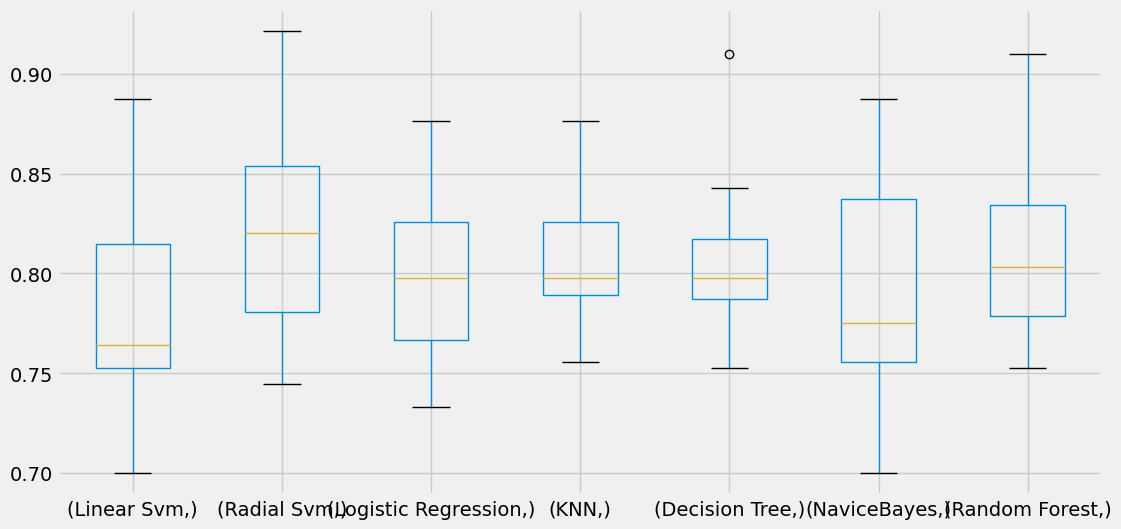

In [57]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

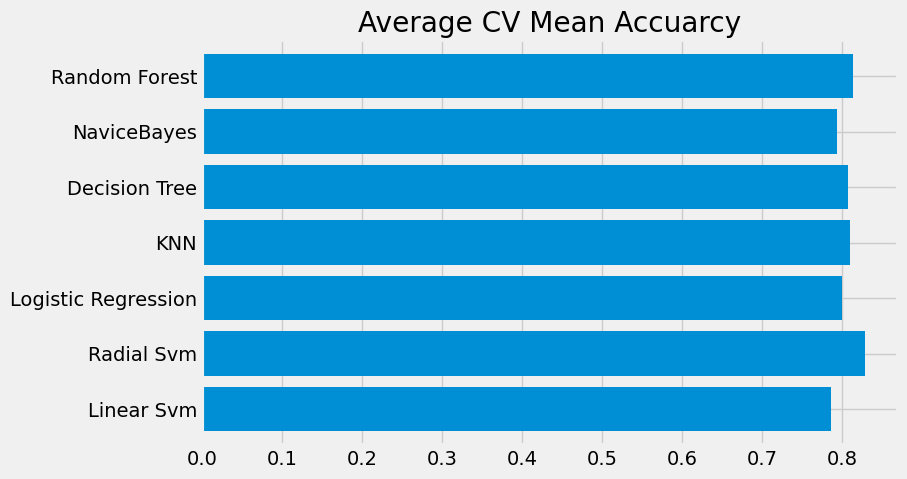

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuarcy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

분류 정확도는 종종 데이터 불균형으로 인해 오해의 소지가 존재함.

모델이 어디에서 잘못되었는지, 모델이 잘못 예측한 클래스를 보여주는 confusion matirx를 통해 요약된 결과를 얻을 수 있음.

### Confusion Matrix

잘 만들어진 / 잘못 만들어진 분류기의 수를 제공

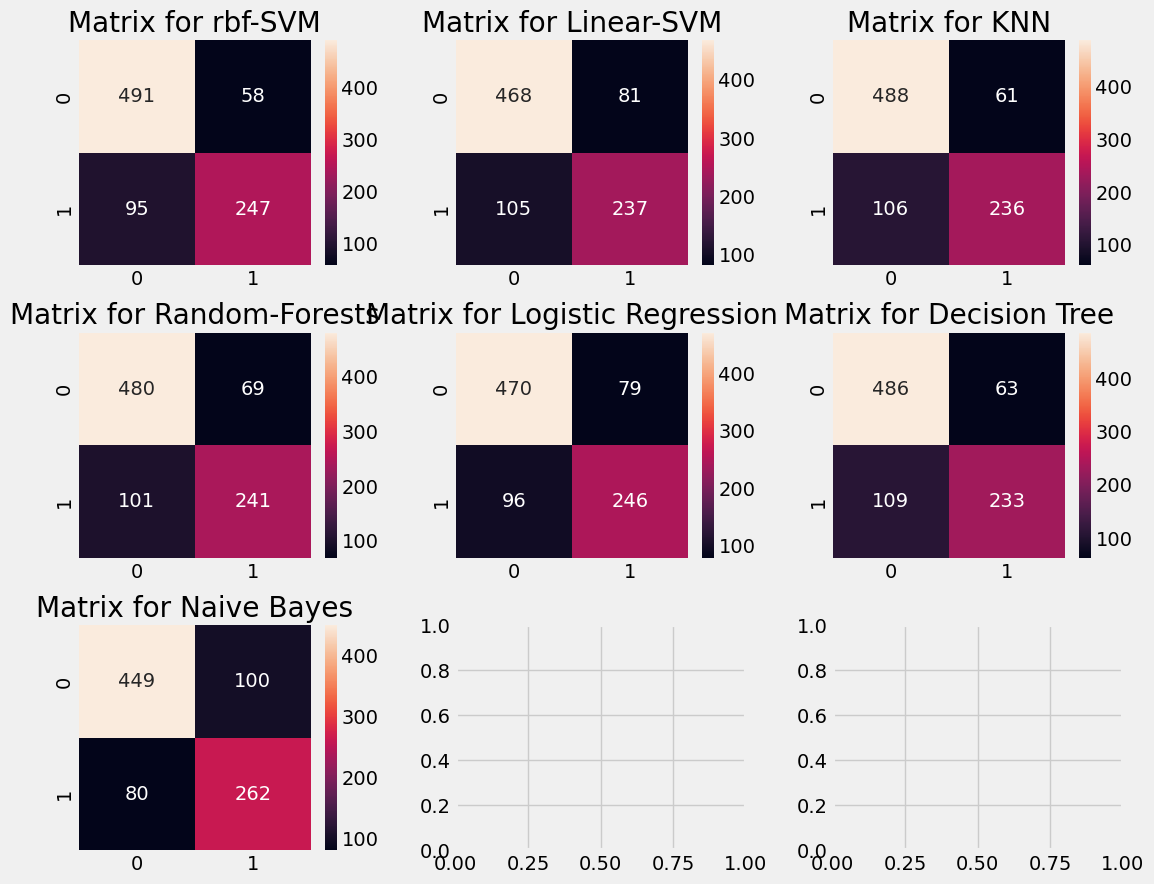

In [59]:
f, ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=10), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
                           
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
                           
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
                           
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

**Confusion Matrix 해석**

rbf-SVM의 경우,
```
1) 맞게 예측한 수는 491(for dead)+247(for survived). 
    CV 정확도: (491+247)/891 = 82.8% (위에서 구한 CV mean과 같음)
2) 58명의 사망한 사람을 생존했다고 잘못 예측했으며, 95명의 생존한 사람들을 사망했다고 예측함.
```
모든 matrix를 보면, rbf-SVM이 사망한 승객을 사망했다고 정확하게 예측할 가능성이 높지만, NB은 생존한 승객을 생존했다고 정확하게 예측할 가능성이 더 높음.

### Hyper-Parameters Tuning
SVM의 C와 gamma 같이 분류기 별로 다른 매개변수를 하이퍼 파라미터라고 함.
- 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻기 위해 조정 가능
- 이어서, SVM과 RandomForest의 하이퍼 파라미터를 조정함

#### SVM

In [60]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


#### Random Forest

In [61]:
n_estimators=range(100,1000,100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193208210407382
RandomForestClassifier(n_estimators=900, random_state=0)


- rbf-SVM의 best_score는 82.82% (C=0.6, gamma=0.1)
- RandomForest의 best_score는 81.9% (n_estimators=900)

### Ensembling

앙상블은 모델의 성능과 정확도를 높이는 가장 좋은 방법임.
- 다양한 모델들을 조합하여 하나의 강력한 모델을 만드는 것
1. Voting Classifier
2. Bagging
3. Boosting